# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
pip install requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [5]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | British airways lost bags ...
1,✅ Trip Verified | The check in process and rew...
2,"✅ Trip Verified | We flew in November 2023, ..."
3,✅ Trip Verified | I left for London from Johan...
4,✅ Trip Verified | After an excellent flight ...


In [7]:
df

,reviews
0,✅ Trip Verified | British airways lost bags ...
1,✅ Trip Verified | The check in process and rew...
2,"✅ Trip Verified | We flew in November 2023, ..."
3,✅ Trip Verified | I left for London from Johan...
4,✅ Trip Verified | After an excellent flight ...
...,...
1995,✅ Verified Review | British Airways are reall...
1996,✅ Verified Review | London Heathrow to Cape T...
1997,❎ Unverified | Oh dear: cost-cutting on Briti...
1998,❎ Unverified | London Heathrow - Pisa return....


In [8]:
df.reviews = df.reviews.str.split('|', expand = True)[1]
df

,reviews
0,British airways lost bags in LHR then found...
1,The check in process and reward/loyalty progr...
2,"We flew in November 2023, but it took this ..."
3,I left for London from Johannesburg at 21:15 ...
4,After an excellent flight on a 777 CPT to L...
...,...
1995,British Airways are really trying to take al...
1996,London Heathrow to Cape Town return. This re...
1997,Oh dear: cost-cutting on British Airways has...
1998,London Heathrow - Pisa return. I fly this ro...


**Rule-based approach**

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

**Data preprocessing steps:**

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

## Step 1: Cleaning the text|

In [11]:
import re

# Defining a function to clean the text
def clean(text):

# Removing all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+',' ', str(text))
    return text

# cleaning the review column text
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,British airways lost bags in LHR then found...,British airways lost bags in LHR then found t...
1,The check in process and reward/loyalty progr...,The check in process and reward loyalty progr...
2,"We flew in November 2023, but it took this ...",We flew in November but it took this long to ...
3,I left for London from Johannesburg at 21:15 ...,I left for London from Johannesburg at on Dec...
4,After an excellent flight on a 777 CPT to L...,After an excellent flight on a CPT to LHR the...


## Step 2: Tokenization
Tokenization is the process of breaking down text into smaller units called tokens, which can be words, subwords, or even individual characters. This step is crucial in natural language processing (NLP) and machine learning as it transforms raw text into a format that algorithms can understand and work with. By tokenizing text, we can better analyze and manipulate it for tasks like sentiment analysis, text classification, and more. Essentially, it's like turning a paragraph into a list of manageable, meaningful pieces!

In [13]:
import nltk

NLTK is a leading platform for building Python programs to work with human language data. 

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
with a suite of text processing libraries for classification, tokenization, stemming, tagging, 
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries.

In [15]:
"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences."""
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to C:\Users\Chandra
[nltk_data]     Sena\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Chandra
[nltk_data]     Sena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Chandra
[nltk_data]     Sena\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Step 3: Enrichment – POS tagging
Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

## Step 4: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

## Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

In [17]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to C:\Users\Chandra
[nltk_data]     Sena\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Chandra Sena\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,British airways lost bags in LHR then found...,British airways lost bags in LHR then found t...,"[(British, a), (airways, n), (lost, v), (bags,..."
1,The check in process and reward/loyalty progr...,The check in process and reward loyalty progr...,"[(check, n), (process, n), (reward, n), (loyal..."
2,"We flew in November 2023, but it took this ...",We flew in November but it took this long to ...,"[(flew, v), (November, n), (took, v), (long, a..."
3,I left for London from Johannesburg at 21:15 ...,I left for London from Johannesburg at on Dec...,"[(left, v), (London, n), (Johannesburg, n), (D..."
4,After an excellent flight on a 777 CPT to L...,After an excellent flight on a CPT to LHR the...,"[(excellent, a), (flight, n), (CPT, n), (LHR, ..."


In [18]:
df.tail()

,reviews,Cleaned Reviews,POS tagged
1995,British Airways are really trying to take al...,British Airways are really trying to take all...,"[(British, a), (Airways, n), (really, r), (try..."
1996,London Heathrow to Cape Town return. This re...,London Heathrow to Cape Town return This retu...,"[(London, n), (Heathrow, n), (Cape, n), (Town,..."
1997,Oh dear: cost-cutting on British Airways has...,Oh dear cost cutting on British Airways has l...,"[(Oh, None), (dear, a), (cost, n), (cutting, v..."
1998,London Heathrow - Pisa return. I fly this ro...,London Heathrow Pisa return I fly this route ...,"[(London, n), (Heathrow, n), (Pisa, n), (retur..."
1999,Overnight flight from St Lucia to Gatwick. E...,Overnight flight from St Lucia to Gatwick Eff...,"[(Overnight, a), (flight, n), (St, n), (Lucia,..."


In [19]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,British airways lost bags in LHR then found...,British airways lost bags in LHR then found t...,"[(British, a), (airways, n), (lost, v), (bags,...",British airway lose bag LHR find Sent Cologn...
1,The check in process and reward/loyalty progr...,The check in process and reward loyalty progr...,"[(check, n), (process, n), (reward, n), (loyal...",check process reward loyalty program mess ne...
2,"We flew in November 2023, but it took this ...",We flew in November but it took this long to ...,"[(flew, v), (November, n), (took, v), (long, a...",fly November take long seek satisfactory res...
3,I left for London from Johannesburg at 21:15 ...,I left for London from Johannesburg at on Dec...,"[(left, v), (London, n), (Johannesburg, n), (D...",leave London Johannesburg December issue fli...
4,After an excellent flight on a 777 CPT to L...,After an excellent flight on a CPT to LHR the...,"[(excellent, a), (flight, n), (CPT, n), (LHR, ...",excellent flight CPT LHR return good BA move...


In [20]:
df[['reviews','Lemma']]

,reviews,Lemma
0,British airways lost bags in LHR then found...,British airway lose bag LHR find Sent Cologn...
1,The check in process and reward/loyalty progr...,check process reward loyalty program mess ne...
2,"We flew in November 2023, but it took this ...",fly November take long seek satisfactory res...
3,I left for London from Johannesburg at 21:15 ...,leave London Johannesburg December issue fli...
4,After an excellent flight on a 777 CPT to L...,excellent flight CPT LHR return good BA move...
...,...,...
1995,British Airways are really trying to take al...,British Airways really try take bad part bud...
1996,London Heathrow to Cape Town return. This re...,London Heathrow Cape Town return return jour...
1997,Oh dear: cost-cutting on British Airways has...,Oh dear cost cut British Airways lead become...
1998,London Heathrow - Pisa return. I fly this ro...,London Heathrow Pisa return fly route often ...


# Sentiment Analysis using VADER
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a tool in machine learning used for sentiment analysis. It's specifically designed to analyze the sentiment of social media text, but it's also effective with other types of text. VADER uses a lexicon of words with their associated sentiment scores, along with rules that handle punctuation, capitalization, and other textual cues to determine the sentiment intensity. It's known for its ability to capture the nuanced sentiment in texts, like social media posts, making it a popular choice for sentiment analysis tasks.

In [37]:
!pip install vaderSentiment

In [43]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,British airways lost bags in LHR then found...,British airways lost bags in LHR then found t...,"[(British, a), (airways, n), (lost, v), (bags,...",British airway lose bag LHR find Sent Cologn...,-0.5994,Negative
1,The check in process and reward/loyalty progr...,The check in process and reward loyalty progr...,"[(check, n), (process, n), (reward, n), (loyal...",check process reward loyalty program mess ne...,0.2500,Neutral
2,"We flew in November 2023, but it took this ...",We flew in November but it took this long to ...,"[(flew, v), (November, n), (took, v), (long, a...",fly November take long seek satisfactory res...,0.4581,Neutral
3,I left for London from Johannesburg at 21:15 ...,I left for London from Johannesburg at on Dec...,"[(left, v), (London, n), (Johannesburg, n), (D...",leave London Johannesburg December issue fli...,-0.9401,Negative
4,After an excellent flight on a 777 CPT to L...,After an excellent flight on a CPT to LHR the...,"[(excellent, a), (flight, n), (CPT, n), (LHR, ...",excellent flight CPT LHR return good BA move...,0.9880,Positive


In [45]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    993
Negative    772
Neutral     235
Name: count, dtype: int64

# Visualization of Sentiment Analysis

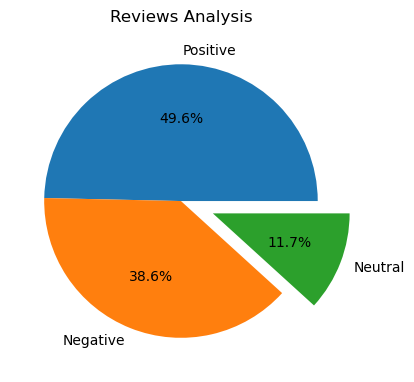

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.show()

In [52]:
df.to_csv("BA_reviews.csv")

## Forming a wordcloud from extracted data 

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

In [58]:
!pip install wordcloud

   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/299.9 kB 1.4 MB/s eta 0:00:01
   --------------------------- ------------ 204.8/299.9 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 3.1 MB/s eta 0:00:00


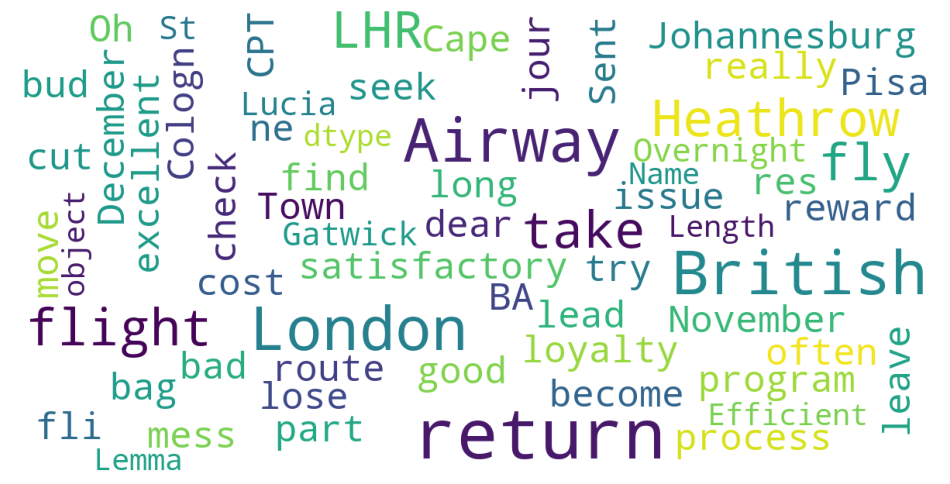

In [60]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)